# **Multimodel data**

In [6]:
!pip install lime --quiet


In [21]:
import pandas as pd

# Load clinical test data
clinical_data = pd.read_csv("/content/Copy of clinical_clean.csv")


In [ ]:
for col in numerical_cols:
    clinical_clean[col] = clinical_clean[col].astype(str).str.replace(r"[\'\"]", "", regex=True)
    clinical_clean[col] = clinical_clean[col].replace('--', pd.NA)
    clinical_clean[col] = pd.to_numeric(clinical_clean[col], errors='coerce')

clinical_clean[numerical_cols] = clinical_clean[numerical_cols].fillna(clinical_clean[numerical_cols].median())

clinical_clean[categorical_cols] = clinical_clean[categorical_cols].fillna('Unknown')


In [26]:
# ===============================
# 1. Imports
# ===============================
import os, random, pickle
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
np.random.seed(42); random.seed(42); tf.random.set_seed(42)


In [33]:

# ===============================
# 2. Mount drive & dataset paths
# ===============================
from google.colab import drive
drive.mount('/content/drive')

IMAGE_ROOT = "/content/drive/MyDrive/images data nlp"
CLINICAL_TSV = "/content/clinical.tsv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import shutil
import os
import random


Image split done.
Found 1171 images belonging to 4 classes.
Found 363 images belonging to 4 classes.
Found 363 images belonging to 4 classes.
Clinical preprocessed shape: (2466, 210)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
Embeddings shapes: (1171, 2048) (363, 2048) (363, 2048)
Assigned clinical shapes: (1171, 210)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_in (InputLayer) │ (None, 2048)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clin_in             │ (None, 210)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │  1,049,088 │ img_in[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     27,008 │ clin_in[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 512)       │    262,656 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 576)       │          0 │ dense_3[0][0],    │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 512)       │    295,424 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    131,328 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 4)         │      1,028 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,779,396 (6.79 MB)

 Trainable params: 1,777,092 (6.78 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/15


37/37 - 15s - 402ms/step - accuracy: 0.4765 - loss: 1.3238 - val_accuracy: 0.2562 - val_loss: 1.3536 - learning_rate: 1.0000e-04
Epoch 2/15


37/37 - 0s - 9ms/step - accuracy: 0.6533 - loss: 0.8378 - val_accuracy: 0.2479 - val_loss: 1.3070 - learning_rate: 1.0000e-04
Epoch 3/15


37/37 - 0s - 9ms/step - accuracy: 0.7344 - loss: 0.6759 - val_accuracy: 0.2369 - val_loss: 1.2805 - learning_rate: 1.0000e-04
Epoch 4/15


37/37 - 0s - 9ms/step - accuracy: 0.7635 - loss: 0.5961 - val_accuracy: 0.3499 - val_loss: 1.2164 - learning_rate: 1.0000e-04
Epoch 5/15


37/37 - 0s - 8ms/step - accuracy: 0.8044 - loss: 0.5383 - val_accuracy: 0.5537 - val_loss: 1.1013 - learning_rate: 1.0000e-04
Epoch 6/15


37/37 - 0s - 9ms/step - accuracy: 0.8198 - loss: 0.4575 - val_accuracy: 0.6281 - val_loss: 0.9950 - learning_rate: 1.0000e-04
Epoch 7/15


37/37 - 0s - 10ms/step - accuracy: 0.8437 - loss: 0.4181 - val_accuracy: 0.6887 - val_loss: 0.9424 - learning_rate: 1.0000e-04
Epoch 8/15


37/37 - 1s - 14ms/step - accuracy: 0.8540 - loss: 0.3787 - val_accuracy: 0.7410 - val_loss: 0.8257 - learning_rate: 1.0000e-04
Epoch 9/15


37/37 - 0s - 12ms/step - accuracy: 0.8728 - loss: 0.3379 - val_accuracy: 0.8457 - val_loss: 0.6522 - learning_rate: 1.0000e-04
Epoch 10/15


37/37 - 0s - 12ms/step - accuracy: 0.8890 - loss: 0.3068 - val_accuracy: 0.8457 - val_loss: 0.5557 - learning_rate: 1.0000e-04
Epoch 11/15


37/37 - 1s - 18ms/step - accuracy: 0.9095 - loss: 0.2495 - val_accuracy: 0.8898 - val_loss: 0.4225 - learning_rate: 1.0000e-04
Epoch 12/15


37/37 - 0s - 14ms/step - accuracy: 0.9155 - loss: 0.2387 - val_accuracy: 0.8678 - val_loss: 0.3924 - learning_rate: 1.0000e-04
Epoch 13/15


37/37 - 0s - 13ms/step - accuracy: 0.9172 - loss: 0.2315 - val_accuracy: 0.8981 - val_loss: 0.3125 - learning_rate: 1.0000e-04
Epoch 14/15


37/37 - 1s - 16ms/step - accuracy: 0.9291 - loss: 0.2029 - val_accuracy: 0.9008 - val_loss: 0.2947 - learning_rate: 1.0000e-04
Epoch 15/15


37/37 - 0s - 9ms/step - accuracy: 0.9496 - loss: 0.1679 - val_accuracy: 0.9394 - val_loss: 0.2310 - learning_rate: 1.0000e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Accuracy: 0.9173553719008265
              precision    recall  f1-score   support

           0     0.8387    0.7879    0.8125        33
           1     0.9667    0.9177    0.9416       158
           2     0.8507    0.9661    0.9048       118
           3     1.0000    0.8889    0.9412        54

    accuracy                         0.9174       363
   macro avg     0.9140    0.8901    0.9000       363
weighted avg     0.9223    0.9174    0.9178       363



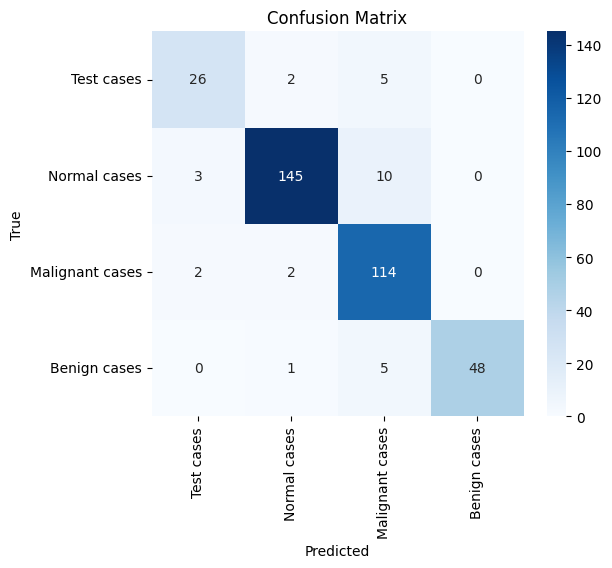

In [34]:

IMG_SIZE = (224,224)
BATCH_SIZE = 16

# ===============================
# 3. Split images into train/val/test
# ===============================
DEST = "/content/my_split"
classes = os.listdir(IMAGE_ROOT)
for split in ["train","val","test"]:
    for cls in classes:
        os.makedirs(os.path.join(DEST, split, cls), exist_ok=True)

for cls in classes:
    cls_path = os.path.join(IMAGE_ROOT, cls)
    imgs = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg",".png"))]
    random.shuffle(imgs)
    n = len(imgs)
    t,v = int(0.7*n), int(0.85*n)
    for f in imgs[:t]:
        shutil.copy(os.path.join(cls_path,f), os.path.join(DEST,"train",cls))
    for f in imgs[t:v]:
        shutil.copy(os.path.join(cls_path,f), os.path.join(DEST,"val",cls))
    for f in imgs[v:]:
        shutil.copy(os.path.join(cls_path,f), os.path.join(DEST,"test",cls))
print("Image split done.")

# ===============================
# 4. Image generators (no augmentation)
# ===============================
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(DEST,"train"), target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(DEST,"val"), target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(DEST,"test"), target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# ===============================
# 5. Load & preprocess clinical TSV
# ===============================
clinical_df = pd.read_csv(CLINICAL_TSV, sep="\t")
# separate numerical and categorical
num_cols = clinical_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = clinical_df.select_dtypes(include=['object']).columns.tolist()

# Fill missing values and scale
if num_cols:
    clinical_df[num_cols] = SimpleImputer(strategy='median').fit_transform(clinical_df[num_cols])
for c in cat_cols:
    clinical_df[c] = LabelEncoder().fit_transform(clinical_df[c].fillna("Unknown"))
clinical_df[clinical_df.columns] = StandardScaler().fit_transform(clinical_df)

print("Clinical preprocessed shape:", clinical_df.shape)

# ===============================
# 6. Extract image embeddings using ResNet50
# ===============================
base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0],IMG_SIZE[1],3))
gap = layers.GlobalAveragePooling2D()(base.output)
img_model = models.Model(inputs=base.input, outputs=gap)
img_model.trainable = False

def extract_embeddings(gen):
    steps = int(np.ceil(gen.samples / gen.batch_size))
    emb = img_model.predict(gen, steps=steps, verbose=1)
    labels = np.array(gen.classes)
    return emb, labels

train_img_emb, train_labels = extract_embeddings(train_gen)
val_img_emb, val_labels = extract_embeddings(val_gen)
test_img_emb, test_labels = extract_embeddings(test_gen)
print("Embeddings shapes:", train_img_emb.shape, val_img_emb.shape, test_img_emb.shape)

# ===============================
# 7. Randomly assign clinical features to image samples
# ===============================
rng = np.random.default_rng(42)
def assign_random(tab_df, n):
    idx = rng.integers(0, tab_df.shape[0], size=n)
    return tab_df.iloc[idx].to_numpy().astype('float32')

train_clin = assign_random(clinical_df, train_img_emb.shape[0])
val_clin   = assign_random(clinical_df, val_img_emb.shape[0])
test_clin  = assign_random(clinical_df, test_img_emb.shape[0])
print("Assigned clinical shapes:", train_clin.shape)

# ===============================
# 8. Fusion model (image + clinical)
# ===============================
NUM_CLASSES = len(classes)
IMAGE_EMBED_DIM = train_img_emb.shape[1]
CLINICAL_VECTOR_DIM = 64
FUSION_HIDDEN = 512

img_in = layers.Input(shape=(IMAGE_EMBED_DIM,), name='img_in')
clin_in = layers.Input(shape=(train_clin.shape[1],), name='clin_in')

# Clinical MLP
c = layers.Dense(128, activation='relu')(clin_in)
c = layers.BatchNormalization()(c)
c = layers.Dropout(0.3)(c)
c = layers.Dense(CLINICAL_VECTOR_DIM, activation='relu')(c)

# Image bottleneck
i = layers.Dense(512, activation='relu')(img_in)
i = layers.BatchNormalization()(i)
i = layers.Dropout(0.3)(i)
i = layers.Dense(512, activation='relu')(i)

# Concatenate & fusion
concat = layers.Concatenate()([i,c])
f = layers.Dense(FUSION_HIDDEN, activation='relu')(concat)
f = layers.BatchNormalization()(f)
f = layers.Dropout(0.4)(f)
f = layers.Dense(256, activation='relu')(f)
out = layers.Dense(NUM_CLASSES, activation='softmax')(f)

fusion_model = models.Model(inputs=[img_in, clin_in], outputs=out)
fusion_model.compile(optimizer=optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
fusion_model.summary()

# ===============================
# 9. Prepare arrays & train
# ===============================
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(train_labels, NUM_CLASSES)
y_val_cat   = to_categorical(val_labels, NUM_CLASSES)
y_test_cat  = to_categorical(test_labels, NUM_CLASSES)

X_train = [train_img_emb, train_clin]
X_val   = [val_img_emb, val_clin]
X_test  = [test_img_emb, test_clin]

ckpt = "/content/fusion_best.h5"
cbs = [
    callbacks.ModelCheckpoint(ckpt, save_best_only=True, monitor='val_loss'),
    callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = fusion_model.fit(X_train, y_train_cat,
                           validation_data=(X_val, y_val_cat),
                           epochs=15, batch_size=32, callbacks=cbs, verbose=2)

# ===============================
# 10. Evaluate
# ===============================
fusion_model.load_weights(ckpt)
y_prob = fusion_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_labels

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# ===============================
# 11. Save model
# ===============================
fusion_model.save("/content/fusion_model_imaging_clinical.h5")
with open("/content/clinical_scaler.pkl","wb") as f:
    pickle.dump({"scaler": StandardScaler(), "cols": clinical_df.columns.tolist()}, f)


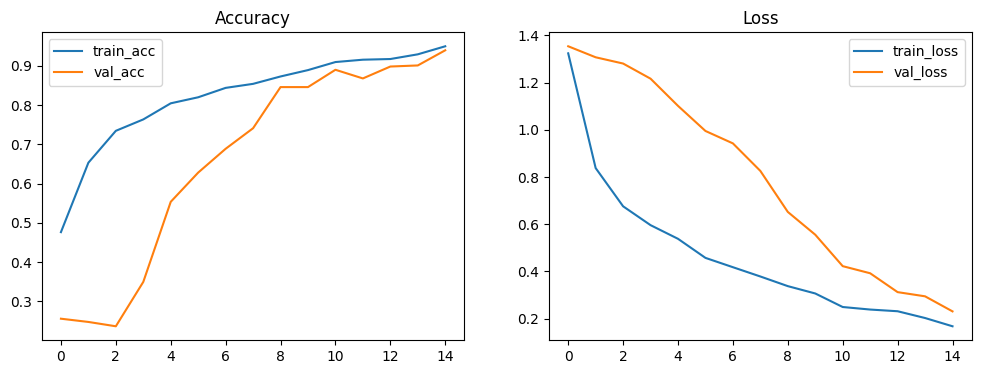

In [35]:
h = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h['accuracy'], label='train_acc'); plt.plot(h['val_accuracy'], label='val_acc'); plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(h['loss'], label='train_loss'); plt.plot(h['val_loss'], label='val_loss'); plt.legend(); plt.title('Loss')
plt.show()


In [36]:
with open("/content/clinical_scaler.pkl","wb") as f:
    pickle.dump({"scaler": StandardScaler(), "cols": clinical_df.columns.tolist()}, f)


In [40]:

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [41]:
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8918 - loss: 0.3017
Test Accuracy: 0.9173553586006165


In [42]:
from tensorflow.keras.models import load_model
model = load_model("/content/fusion_model_imaging_clinical.h5")
y_prob = model.predict(X_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


In [43]:
!pip install shap --quiet


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6694/6694 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6707/6707 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6691/6691 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


/tmp/ipython-input-1244524150.py:32: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_combined[:10], feature_names=feat_names)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packa

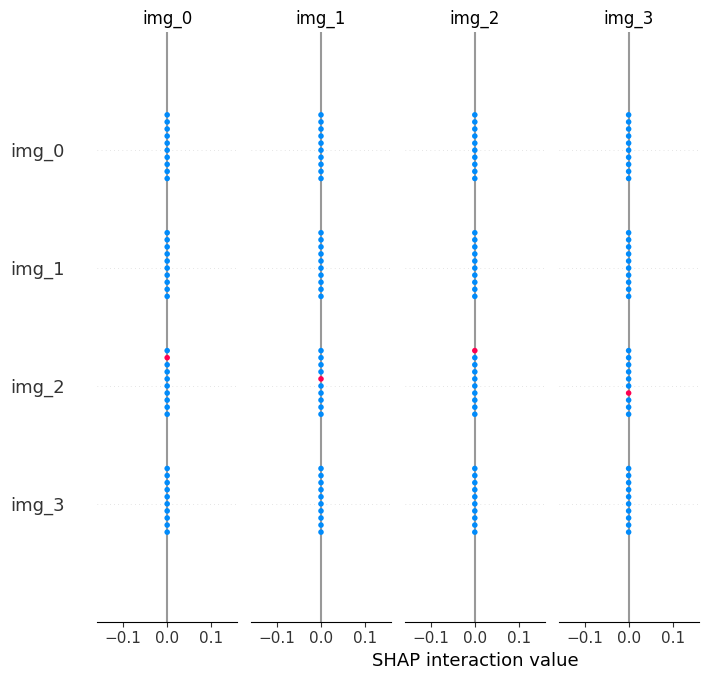

In [49]:
# ===============================
# SHAP explanation for fusion model
# ===============================
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. Combine image embeddings and clinical features into a single array
X_train_combined = np.concatenate([train_img_emb, train_clin], axis=1)
X_test_combined  = np.concatenate([test_img_emb, test_clin], axis=1)

# 2. Define a prediction function for SHAP
def model_predict_combined(x):
    img_part = x[:, :train_img_emb.shape[1]]
    clin_part = x[:, train_img_emb.shape[1]:]
    return fusion_model.predict([img_part, clin_part])

# 3. Select background dataset (subset of training data)
bg_idx = np.random.choice(X_train_combined.shape[0], size=50, replace=False)
bg_data = X_train_combined[bg_idx]

# 4. Create KernelExplainer
explainer = shap.KernelExplainer(model_predict_combined, bg_data)

# 5.  SHAP values for first 10 test samples
shap_values = explainer.shap_values(X_test_combined[:10])

# 6.  feature names
feat_names = [f"img_{i}" for i in range(train_img_emb.shape[1])] + clinical_df.columns.tolist()

# 7. Summary plot for all features
shap.summary_plot(shap_values, X_test_combined[:10], feature_names=feat_names)


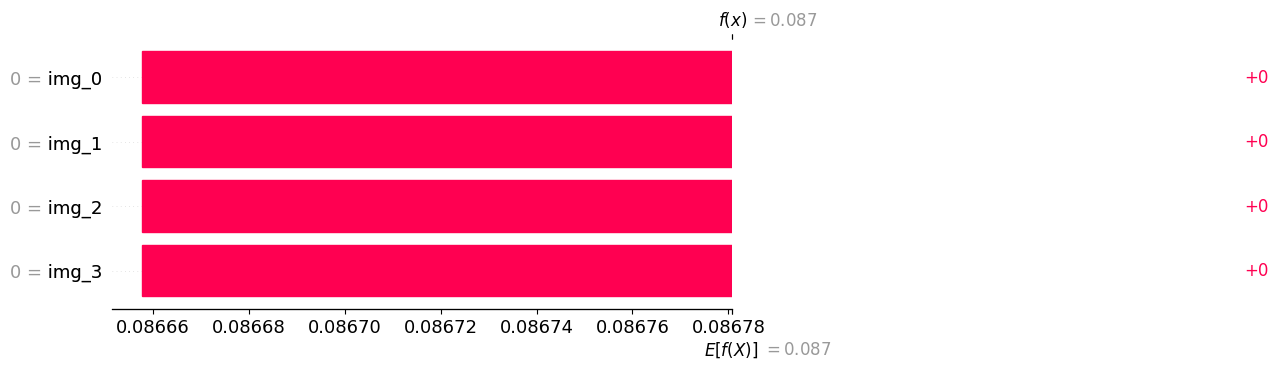

In [50]:
sample_idx = 0
class_idx = 0
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[class_idx][sample_idx],
        base_values=explainer.expected_value[class_idx],
        data=X_test_combined[sample_idx],
        feature_names=feat_names
    )
)
